In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
str = '2024-08-22 AM 12:00:20' # [오전] 을 [AM] 으로 바꿔야 함
time1 = datetime.strptime(str, '%Y-%m-%d %p %I:%M:%S')
print(time1)

2024-08-22 00:00:20


In [3]:
def parse_date(str):
    s = str.replace('오전', 'am')
    s = s.replace('오후', 'pm')
    return datetime.strptime(s, '%Y-%m-%d %p %I:%M:%S')

print(parse_date('2024-08-22 오전 12:00:20'))

2024-08-22 00:00:20


In [4]:
unit0 = pd.read_csv('./data/cheonan_unit_total_w1/cheonan_unit0_total.csv', encoding='euc-kr', parse_dates=['DATE'], date_parser=parse_date)
unit0 = unit0[['DATE', 'CO2', 'VOC', 'TEMP', 'HUMID', 'PARTICLE']]
unit0.sort_values('DATE', inplace=True)
print(unit0.head())
print(unit0.tail())

                 DATE  CO2  VOC  TEMP  HUMID  PARTICLE
0 2024-08-22 00:00:20  0.4    6  26.8   43.8         0
1 2024-08-22 00:01:14  0.4    6  26.8   43.8         0
2 2024-08-22 00:01:59  0.4    5  26.9   43.8         0
3 2024-08-22 00:02:54  0.4   10  26.8   43.8         0
4 2024-08-22 00:03:48  0.4    4  26.8   43.8         0
                     DATE   CO2  VOC  TEMP  HUMID  PARTICLE
10099 2024-08-28 10:41:00  0.49  214  26.8   43.6         0
10100 2024-08-28 10:41:54  0.48  220  26.8   43.5         0
10101 2024-08-28 10:42:48  0.54  223  26.8   43.5         0
10102 2024-08-28 10:43:43  0.49  224  26.8   43.5         0
10103 2024-08-28 10:44:38  0.49  224  26.8   43.5         0


C:\Users\tak\AppData\Local\Temp\ipykernel_134956\761910868.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  unit0 = pd.read_csv('./data/cheonan_unit_total_w1/cheonan_unit0_total.csv', encoding='euc-kr', parse_dates=['DATE'], date_parser=parse_date)


In [5]:
unit0['d_truncated'] = unit0['DATE'].apply(lambda x: datetime(x.year, x.month, x.day))
print(unit0.head())

                 DATE  CO2  VOC  TEMP  HUMID  PARTICLE d_truncated
0 2024-08-22 00:00:20  0.4    6  26.8   43.8         0  2024-08-22
1 2024-08-22 00:01:14  0.4    6  26.8   43.8         0  2024-08-22
2 2024-08-22 00:01:59  0.4    5  26.9   43.8         0  2024-08-22
3 2024-08-22 00:02:54  0.4   10  26.8   43.8         0  2024-08-22
4 2024-08-22 00:03:48  0.4    4  26.8   43.8         0  2024-08-22


{'whiskers': [<matplotlib.lines.Line2D at 0x29246910b30>,
 'caps': [<matplotlib.lines.Line2D at 0x29246910500>,
 'boxes': [<matplotlib.lines.Line2D at 0x292467875f0>,
 'medians': [<matplotlib.lines.Line2D at 0x29246912e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x29246913140>,
 'means': []}

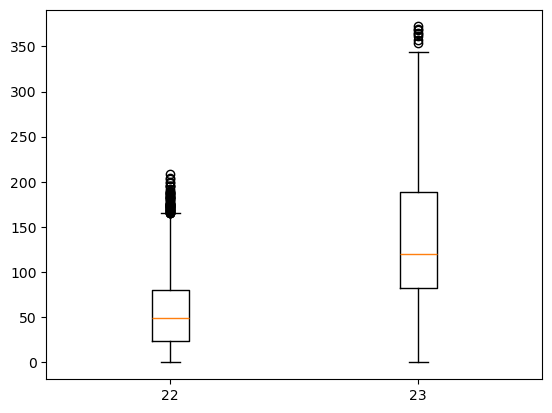

In [6]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)
axes1.boxplot([
    unit0[unit0['d_truncated'] == '2024-08-22']['VOC'],
    unit0[unit0['d_truncated'] == '2024-08-23']['VOC']],
    labels=['22', '23'])

<Axes: xlabel='d_truncated', ylabel='VOC'>

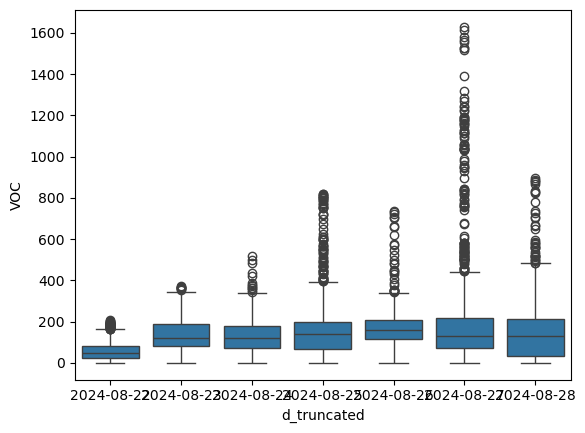

In [7]:
ax = plt.subplots()
sns.boxplot(x='d_truncated', y='VOC', data=unit0)

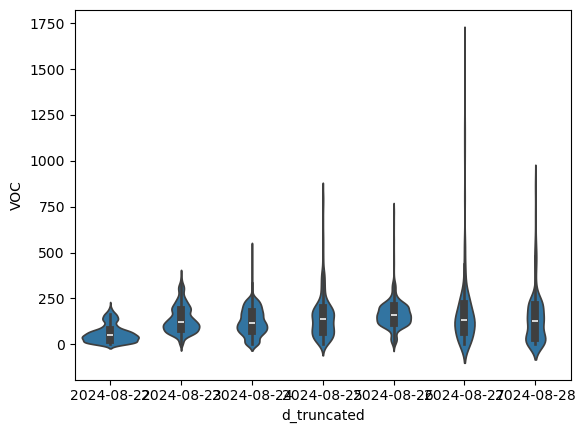

In [8]:
ax = sns.violinplot(x='d_truncated', y='VOC', data=unit0)

In [9]:
print(unit0.groupby('d_truncated').size())
print(unit0[unit0['d_truncated'] == '2024-08-27'])

d_truncated
2024-08-22    1627
2024-08-23    1643
2024-08-24    1645
2024-08-25    1641
2024-08-26    1656
2024-08-27    1706
2024-08-28     739
dtype: int64
                    DATE   CO2  VOC  TEMP  HUMID  PARTICLE d_truncated
8212 2024-08-27 00:00:47  0.50  155  26.9   43.1         0  2024-08-27
8213 2024-08-27 00:01:33  0.50  154  26.9   43.2         0  2024-08-27
8214 2024-08-27 00:02:27  0.50  154  26.9   43.1         0  2024-08-27
8215 2024-08-27 00:03:22  0.50  149  26.9   43.2         0  2024-08-27
8216 2024-08-27 00:04:08  0.50  154  26.9   43.1         0  2024-08-27
...                  ...   ...  ...   ...    ...       ...         ...
9411 2024-08-27 23:56:22  0.41   85  26.8   43.1         0  2024-08-27
9412 2024-08-27 23:57:16  0.41   79  26.8   43.1         0  2024-08-27
9413 2024-08-27 23:58:02  0.40   84  26.8   43.1         0  2024-08-27
9414 2024-08-27 23:58:57  0.41   80  26.8   43.1         0  2024-08-27
9415 2024-08-27 23:59:43  0.41   77  26.8   43.1         0  2

In [10]:
unit0_d27 = unit0[unit0['d_truncated'] == '2024-08-27']
print(unit0_d27.head())
print(unit0_d27.tail())

                    DATE  CO2  VOC  TEMP  HUMID  PARTICLE d_truncated
8212 2024-08-27 00:00:47  0.5  155  26.9   43.1         0  2024-08-27
8213 2024-08-27 00:01:33  0.5  154  26.9   43.2         0  2024-08-27
8214 2024-08-27 00:02:27  0.5  154  26.9   43.1         0  2024-08-27
8215 2024-08-27 00:03:22  0.5  149  26.9   43.2         0  2024-08-27
8216 2024-08-27 00:04:08  0.5  154  26.9   43.1         0  2024-08-27
                    DATE   CO2  VOC  TEMP  HUMID  PARTICLE d_truncated
9411 2024-08-27 23:56:22  0.41   85  26.8   43.1         0  2024-08-27
9412 2024-08-27 23:57:16  0.41   79  26.8   43.1         0  2024-08-27
9413 2024-08-27 23:58:02  0.40   84  26.8   43.1         0  2024-08-27
9414 2024-08-27 23:58:57  0.41   80  26.8   43.1         0  2024-08-27
9415 2024-08-27 23:59:43  0.41   77  26.8   43.1         0  2024-08-27


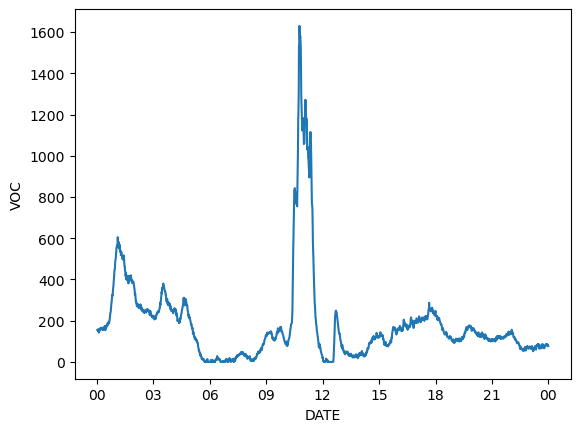

In [15]:
# ticks label - https://stackoverflow.com/questions/62473172/modifying-x-ticks-labels-in-seaborn

from matplotlib import dates

fig, ax = plt.subplots()
sns.lineplot(data=unit0_d27, x='DATE', y='VOC', ax=ax)
ax.xaxis.set_major_formatter(dates.DateFormatter("%H"))